# Майнор Интеллектуальный анализ данных / Введение в анализ данных
## Домашнее задание №5
### Визуализация при обучении моделей машинного обучения

**Общая информация**

В этом задании вы рассмотрите пройденные в курсе методы с точки зрения визуализации их "внутренностей". Девиз задания - все интерпретируемо! Все инструменты были рассмотрены на семинарах, примеры для редких исключений приведены тут же в ноутбуке или по ссылкам.

Сопровождайте ваш код изображеними, комментариями и выводами.

Имейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

Задание основано на Kaggle соревновании [Leaf Classification](https://www.kaggle.com/c/leaf-classification/).

Дана информация о 990 листьях, каждый из которых был сорван с одного из 99 видов растений.</br> 
Необходимо построить модель, которая могла бы определить, к какому растению относится каждый лист.

Большую часть задания вы будете работать с черно-белыми изображениями листьев, а в конце поработаете также с готовыми признаковыми описаниями листьев.

## 0. Загрузка данных

Скачайте данные по ссылкам: [таблица](https://drive.google.com/file/d/1LBc2YeddvEvDaCQHktJPZgJ3tZhJSGHh/view?usp=sharing) и [архив](https://drive.google.com/file/d/1cY5v5T26-_nqLkrJ6yUIVPIhCp7tulSi/view?usp=sharing) с изображениями.

Загрузим таблицу - файл `table_data.csv`.

В нем вы можете найти
* id - идентификатор листика
* species - столбец с названием растения (класс)
* margin, shape, texture - некоторые признаки листьев

In [ ]:
from google.colab import drive
drive.mount('images')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at images


In [ ]:
#DATA_DIR = os.path.join('data')
DATA_DIR = os.path.join('/content', 'images', 'My Drive')
#IMG_DIR = os.path.join(DATA_DIR, 'images')
IMG_DIR = os.path.join('/content', 'images', 'My Drive', 'images')

In [ ]:
filepath = os.path.join(DATA_DIR, 'table_data.csv')
table_data = pd.read_csv(filepath)

In [ ]:
print("Число классов: %d"%table_data.species.nunique())

Число классов: 99


In [ ]:
table_data.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,...,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,...,0.050781,0.001953,0.021484,0.003906,0.027344,0.023438,0.062500,0.000000,0.038086,0.000000,0.019531,0.0,0.001953,0.003906,0.015625,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.000000,0.0,0.053711,0.036133,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,0.007812,0.011719,0.021484,0.001953,0.025391,0.0,0.009766,0.011719,0.007812,0.005859,0.041016,0.001953,0.0,0.015625,0.000000,0.009766,0.001953,0.009766,0.009766,0.015625,0.005859,0.000000,0.017578,0.007812,0.005859,0.009766,0.019531,0.042969,...,0.000977,0.000000,0.000977,0.003906,0.035156,0.015625,0.027344,0.000000,0.000000,0.008789,0.015625,0.0,0.000000,0.011719,0.000977,0.000977,0.000000,0.000000,0.000000,0.005859,0.022461,0.020508,0.021484,0.056641,0.010742,0.008789,0.000000,0.0,0.000977,0.000000,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,0.001953,0.019531,0.001953,0.003906,0.035156,0.0,0.005859,0.000000,0.001953,0.003906,0.039062,0.009766,0.0,0.009766,0.005859,0.027344,0.001953,0.017578,0.003906,0.021484,0.027344,0.027344,0.000000,0.003906,0.011719,0.003906,0.005859,0.044922,...,0.005859,0.019531,0.124020,0.000000,0.017578,0.000977,0.016602,0.009766,0.006836,0.000977,0.005859,0.0,0.000977,0.001953,0.096680,0.016602,0.126950,0.000000,0.036133,0.055664,0.000000,0.001953,0.027344,0.000000,0.006836,0.017578,0.004883,0.0,0.006836,0.022461,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,0.001953,0.044922,0.041016,0.011719,0.041016,0.0,0.009766,0.015625,0.011719,0.007812,0.021484,0.000000,0.0,0.000000,0.015625,0.009766,0.001953,0.017578,0.041016,0.005859,0.021484,0.013672,0.017578,0.000000,0.005859,0.009766,0.027344,0.083984,...,0.000000,0.000000,0.040039,0.005859,0.005859,0.000000,0.003906,0.000000,0.000000,0.110350,0.000000,0.0,0.000000,0.087891,0.023

In [ ]:
table_data.shape

(990, 194)

## Создание контрольного и обучающих множеств (1 балл)

* Задайте `random_seed`, который необходимо будет использовать при **всех** случаях использования генератора случайных чисел
* С помощью LabelEncoder закодируйте столбец `species` из исходных данных - вы должны получить одномерный numpy массив с метками классов от 0 до 98
* В переменную `X` запишите значения признаков margin, shape, texture - вы должны получить numpy-матрицу
* Случайным образом разбейте данные на обучающую и контрольную выборку, причем так, чтобы в контрольной выборке содержалось по 2 объекта каждого класса.
* Сохраните индексы объектов обучающего и контрольного множеств в переменные train_idx и test_idx

#### Hint
[Это](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html#sklearn.model_selection.StratifiedShuffleSplit) может помочь, чтобы сгенерировать выборку с нужными пропорциями классов.

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
import random
random.seed(10000)

In [ ]:
le = LabelEncoder()
le.fit(table_data[table_data.columns[1]])
y = le.transform(table_data[table_data.columns[1]]);

In [ ]:
X = table_data[table_data.columns[2:]].to_numpy()

In [ ]:
train_idx = []
test_idx = []
X_train = []
X_test = []
y_train = []
y_test = []
sss = StratifiedShuffleSplit(n_splits=1, test_size=198) # 198 - так как 99 классов, по 2 объекта
sss.get_n_splits(X, y)
for train_index, test_index in sss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  train_idx = list(train_index)
  test_idx = list(test_index)

Теперь загрузим картинки. В папке `images` лежат 1584 изображения в градациях серого различного размера.

In [ ]:
# попробуем загрузить 1 изображение
filepath = os.path.join(IMG_DIR, '33.jpg')
img = plt.imread(filepath)

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


(357, 700)


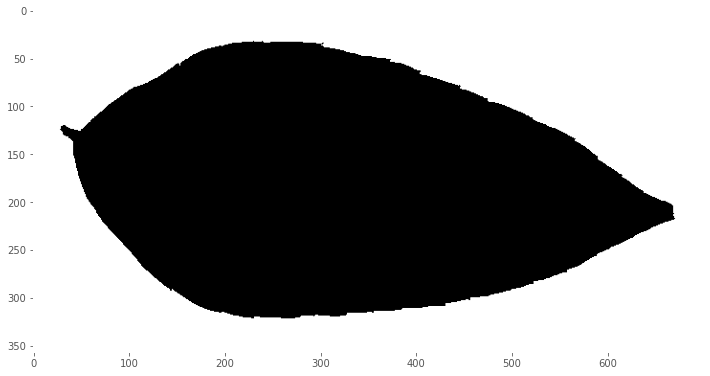

In [ ]:
print(img.shape)
plt.imshow(img, cmap='Greys')
plt.grid(None)

Все изображения имеют разный размер, будем приводить их к размеру 100x100 с помощью функции skimage.transform.resize:

In [ ]:
from skimage.transform import resize

In [ ]:
img_resized = resize(img, (100, 100))

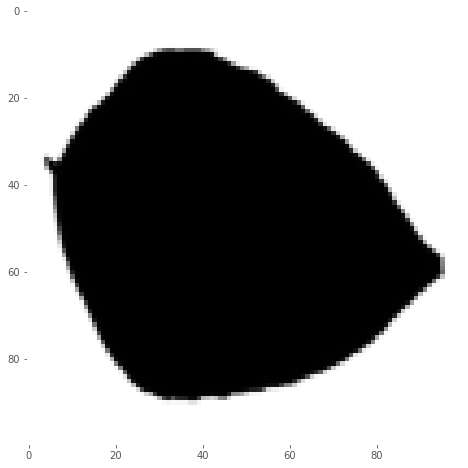

In [ ]:
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

## Загрузка изображений (1 балл)
Загрузите все изображения листьев, отмасштабируйте, вытяните в вектор длины 10000 (np.ravel) и запишите их в массив размера (число изображений) x 10000. Сделайте два массива - с обучающими и контрольными картинками (останутся только не картинки, которые встречались в табличных данных), назовите их imgs_train и imgs_test. Столбец id в таблице соответствует номерам картинок в названиях файлов.  В итоге мы превратим картинки в попиксельные признаковые описания объектов-листьев.

In [ ]:
imgs = []
for i in range(1, 1585):
  filepath = os.path.join(IMG_DIR, '{}.jpg'.format(i))
  img = plt.imread(filepath)
  img_resized = resize(img, (100, 100))
  imgs.append(img_resized.ravel())

imgs = np.array(imgs)
print(imgs.shape)

(1584, 10000)


In [ ]:
id_train = table_data[table_data.columns[0]].to_numpy()

id_test = []
l_id_t = list(id_train)
for i in range(1, 1585):
  if i not in l_id_t:
    id_test.append(i)

id_test = np.array(id_test)

In [ ]:
imgs_train = imgs[id_train - 1]
imgs_test = imgs[id_test - 1]

In [ ]:
imgs_train.shape, imgs_test.shape

((990, 10000), (594, 10000))

## 1. Visualization
Начнем с простой визуализации наших данных. Вам понадобится рисовать несколько картинок на одной - в виде таблицы. Это делается с помощью plt.subplot. Например, нарисуем 25 степенных функций:

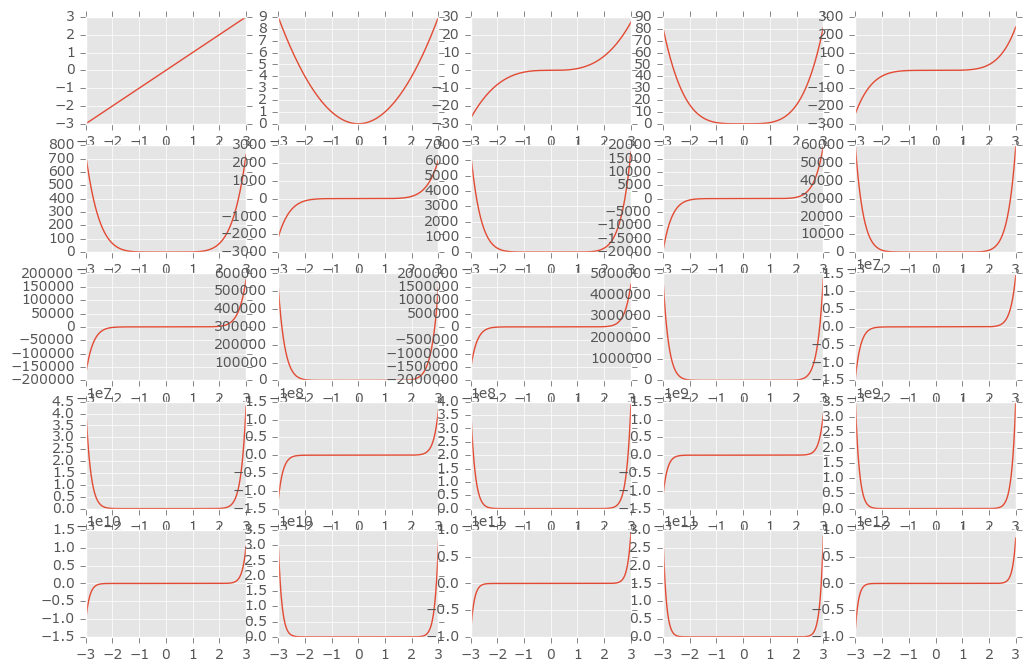

In [ ]:
xs = np.linspace(-3, 3, 1000)
for i in range(1, 26): # числа от 1 до 25
    plt.subplot(5, 5, i) # первое число - сколько картинок по вертикали, второе - сколько по горизонтали, 
                         # третье - номер текущей картинки, если ситать слева направо, сверху вниз
    plt.plot(xs, xs**i)
    # plt.axis("off") # отключить оси, получится просто 25 линий

Кроме того, вам понадобится рисовать гистограммы. Это делается с помощью plt.hist:

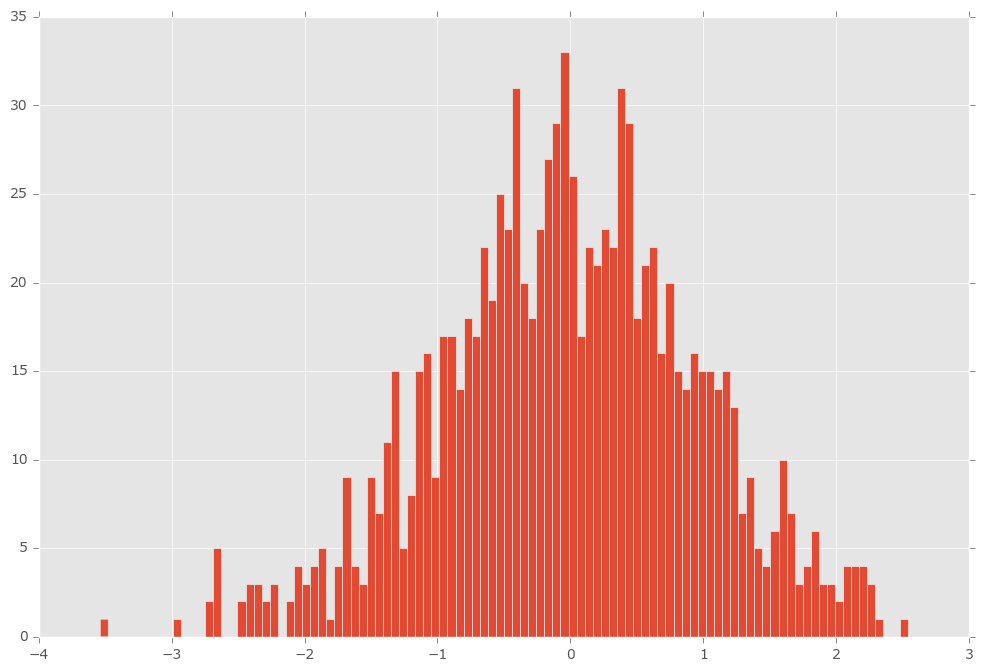

In [ ]:
sample = np.random.normal(size=1000) # гистограмма строится по одномерной выборке - вектору чисел
_ = plt.hist(sample, bins=100) # то, что возвращает функция, сохранять никуда не нужно. bins=100 - число столбиков.

По гистограмме видно, какие значения наиболее популярны, какие - менее.

### Простая визуализация (1 балл код +1 балл выводы)
* Нарисуйте в табличке 10x10 99 изображений листьев - по одному каждого класса (одна ячейка таблицы останется пустой)
* Нарисуйте в табличке 10x10 100 гистограмм значений случайно выбранных пикселей (берем значние пикселя на всех картинках и составляем из них вектор, используйте векторизацию)
* Нарисуйте 1 картинку - "средний лист". Просто усредните все пиксели по изображениям. Затем нарисуйте еще 1 картинку - разброс каждого пикселя (насколько он отклоняется от среднего). Для этого воспользуйтесь функцией np.std

Все пункты выполняйте с использованием обучающей выборки (у нас данные однородны).

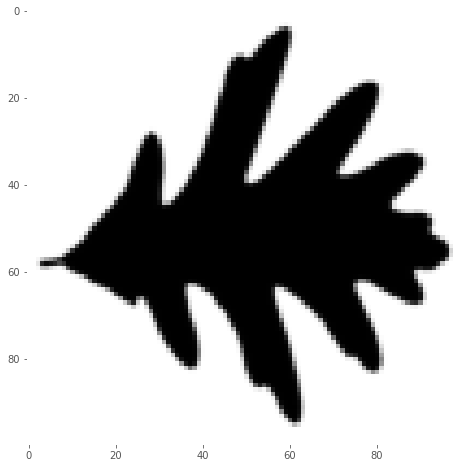

In [ ]:
img = imgs_train[45]
img_resized = np.reshape(img, (100, 100))
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


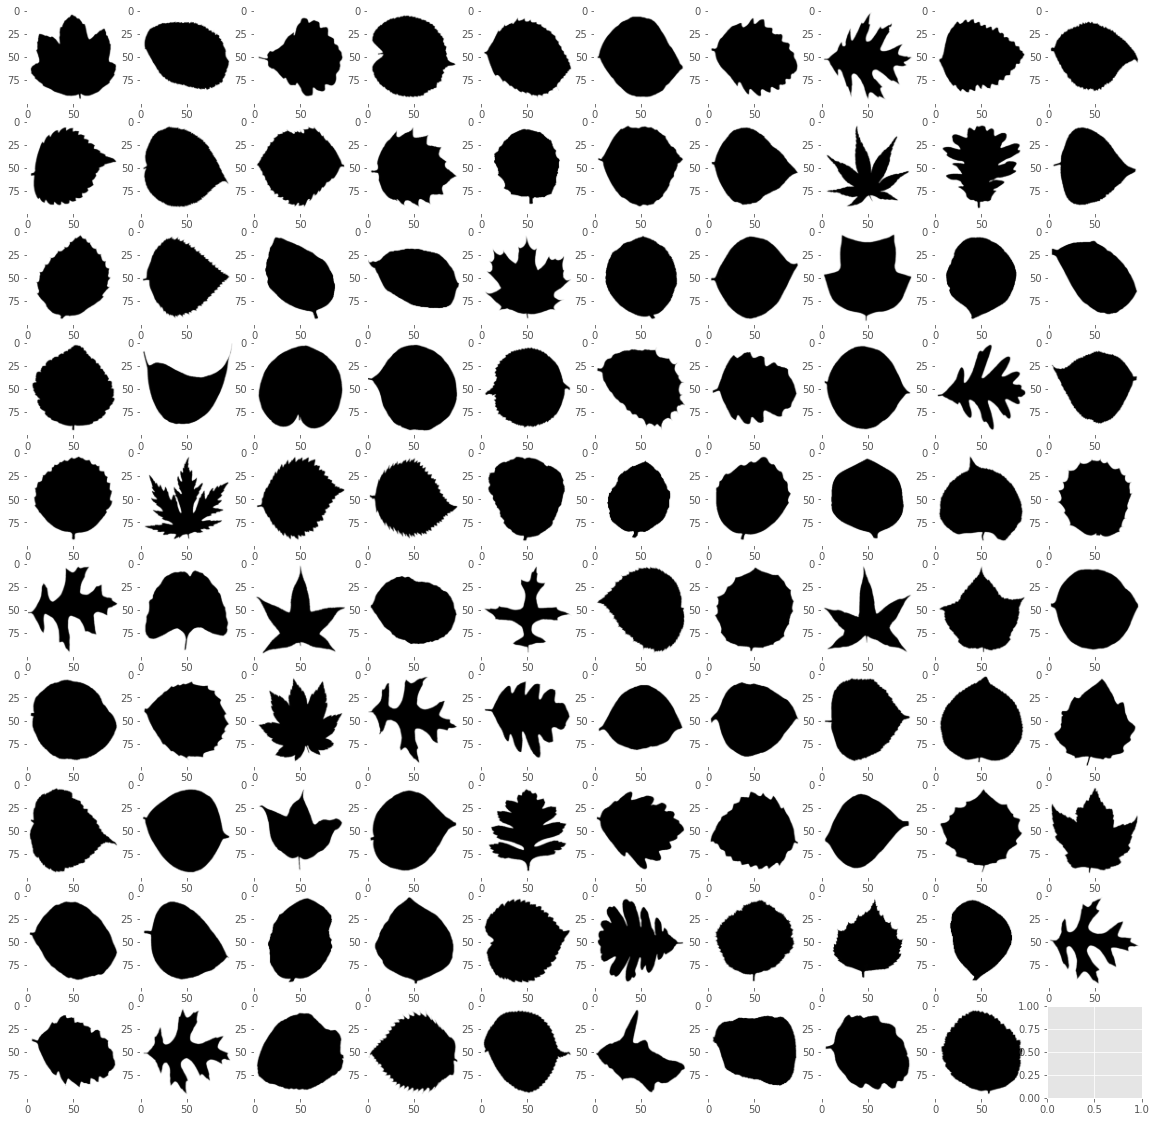

In [ ]:
plt.figure(figsize= (20,20))
range_of_cl = list(range(99))
count = 1
for i in range(990):
    plt.subplot(10, 10, count)
    if count == 100:
      break
    elif y[i] in range_of_cl:
      img = imgs_train[i]
      img_resized = np.reshape(img, (100, 100))
      plt.imshow(img_resized, cmap='Greys')
      plt.grid(None)
      range_of_cl.remove(y[i])
      count += 1

In [ ]:
def hlpfunc(pxl, i):
  return imgs_train[i][pxl]

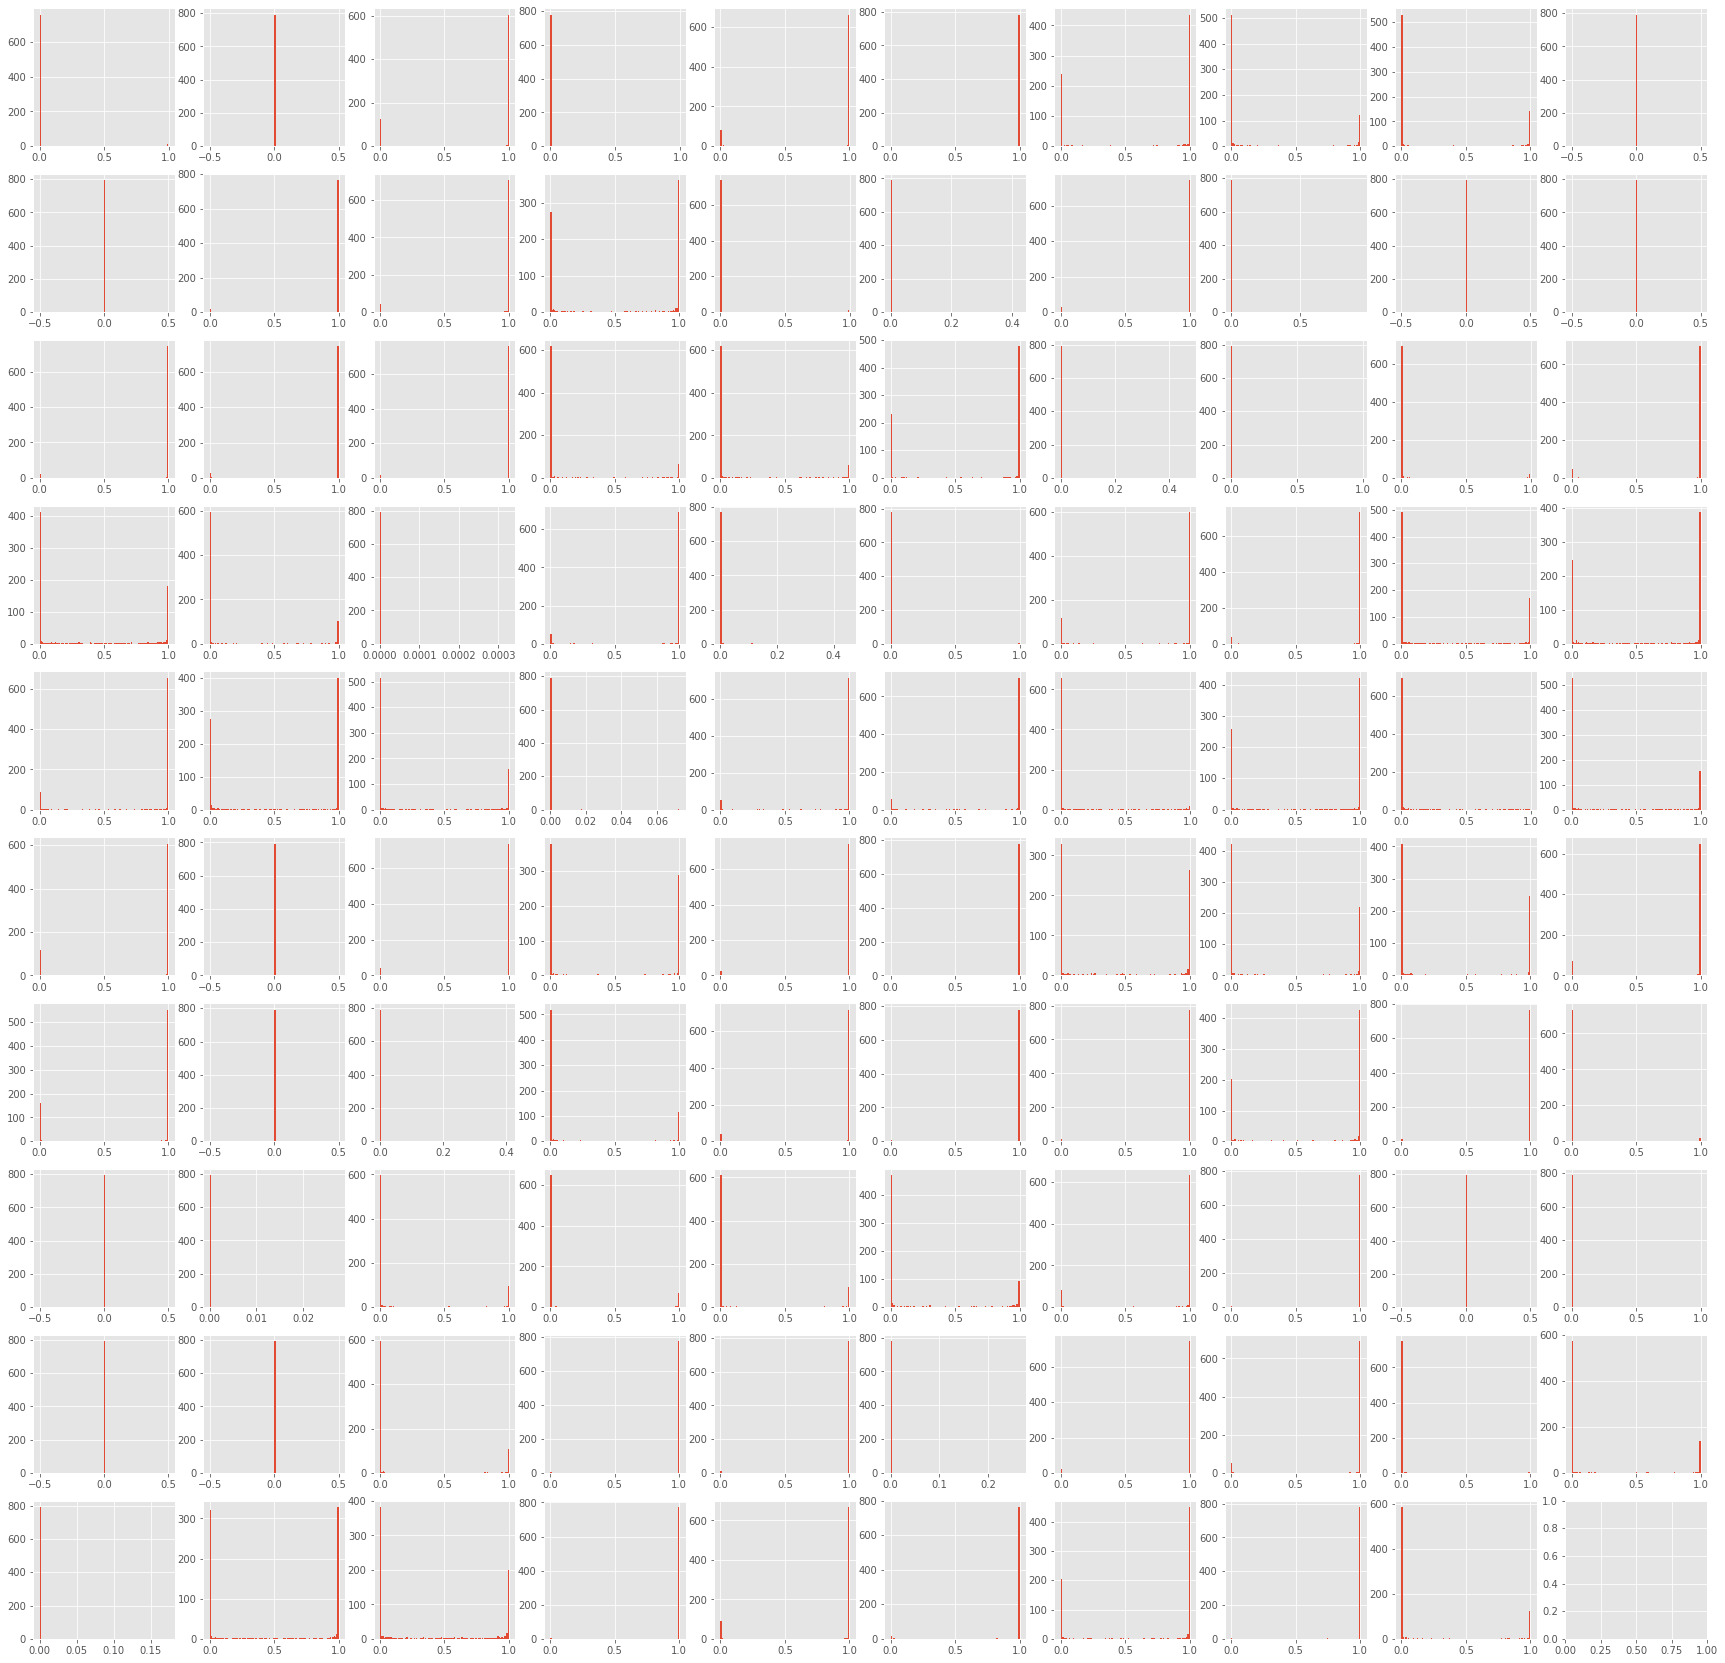

In [ ]:
pixels = np.random.randint(0, 10000, 100)
vhlpfunc = np.vectorize(hlpfunc) 
plt.figure(figsize= (30,30))
count = 1
mh = []
for i in range(792):
  mh.append(vhlpfunc(pixels, i))

mh = np.array(mh)
mh = mh.T

for j in range(100):
  plt.subplot(10, 10, count)
  if count == 100:
    break
  else:
    plt.hist(mh[j], bins=100) 
    count += 1

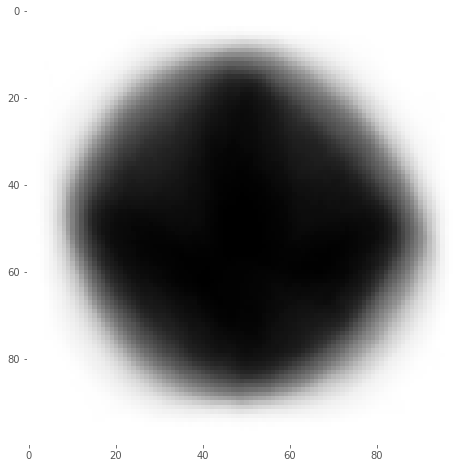

In [ ]:
mean_leaf = np.zeros((1, 10000))
for i in range(792):
  mean_leaf += imgs_train[i]
mean_leaf = mean_leaf / 792
img_resized = np.reshape(mean_leaf, (100, 100))
plt.imshow(img_resized, cmap='Greys')
plt.grid(None)

Ответьте на вопросы:
* Можно ли отличить листья разных классов визуально? Можете ли вы выделить группы похожих классов?
* Каковы минимальное/максимальное значения признаков? Какого множество значений признаков? Какие значения чаще всего принимают признаки? Похожи ли распределения разных признаков между собой?
* Можно ли бинаризовать изображения (чтобы каждый пиксель принимал значение 0 или 1) без сильной потери информации? Почему вы так думаете? По какому порогу лучше бинаризовать?
* Похож ли "средний лист" на обычный лист? Как вы думаете, почему? Много ли пикселей, которые всегда принимают одно и то же значение (константный признак)? 

1) Многие листья разных классов похожи  между собой, поэтому отличить визуально листья разных классов не всегда возможно. Можно выделить как минимум 4 группы похожих классов: цельные (без выделяющихся отдельных частей) листья с гладкими краями, с резными краями, листья с выделяющимися отдельными частями (например, первый лист из листьев выше), резные листья редкой формы 

2) Минимальное значение = 0.0, максимальное = 1.0 \\
   Множество значений = [0.0, 1.0] \\
   Чаще всего значение признака равно 1.0 \\
   Распределения разных признаков похожи, потому что признаки чаще всего принимают значения 0.0 или 1.0, гораздо реже - промежуточные значения

3) Бинаризовать изображения можно, так как признаки очень редко принимают значения, отличные от 0.0 и 1.0. Порог лучше выбрать 0.5 - тогда значения признаков - пикселей округлится, и изображение листа не сильно изменится (пропадут серые пиксели, но они будут заменены на самый подходящий (ближайший) цвет) 

4) "Средний лист" похож на обычный, потому что большинство листьев разных классов похожи. Однако на среднем листе просматриваются редкие классы листьев - три части среднего листа видны отчетливее, чем края между ними. При этом только небольшая часть пикселей принимают одно и то же значение на всех классах листьев - это квадрат 20х20 в центре изображения.

## 2. Exploration
Теперь попробуем разобраться с внутренней структурой наших данных: применим к ним кластеризацию. Ограничимся самым простым методом - KMeans.

### Понижение размерности (1 балл код + 1 балл выводы)
* Выполните кластеризацию листьев с помощью KMeans на 9 кластеров. Метрика по умолчанию.
* Как вы знаете, у каждого кластера в KMeans есть центр - вектор той же размерности, что и объекты. Визуализируйте центры кластеров (переменная cluster\_centers\_ - то же самое, что centers в семинаре) в виде изображений 100x100, оформите их табицей 3x3.
* Повторите предыдущие действия для 25 и 100 кластеров.

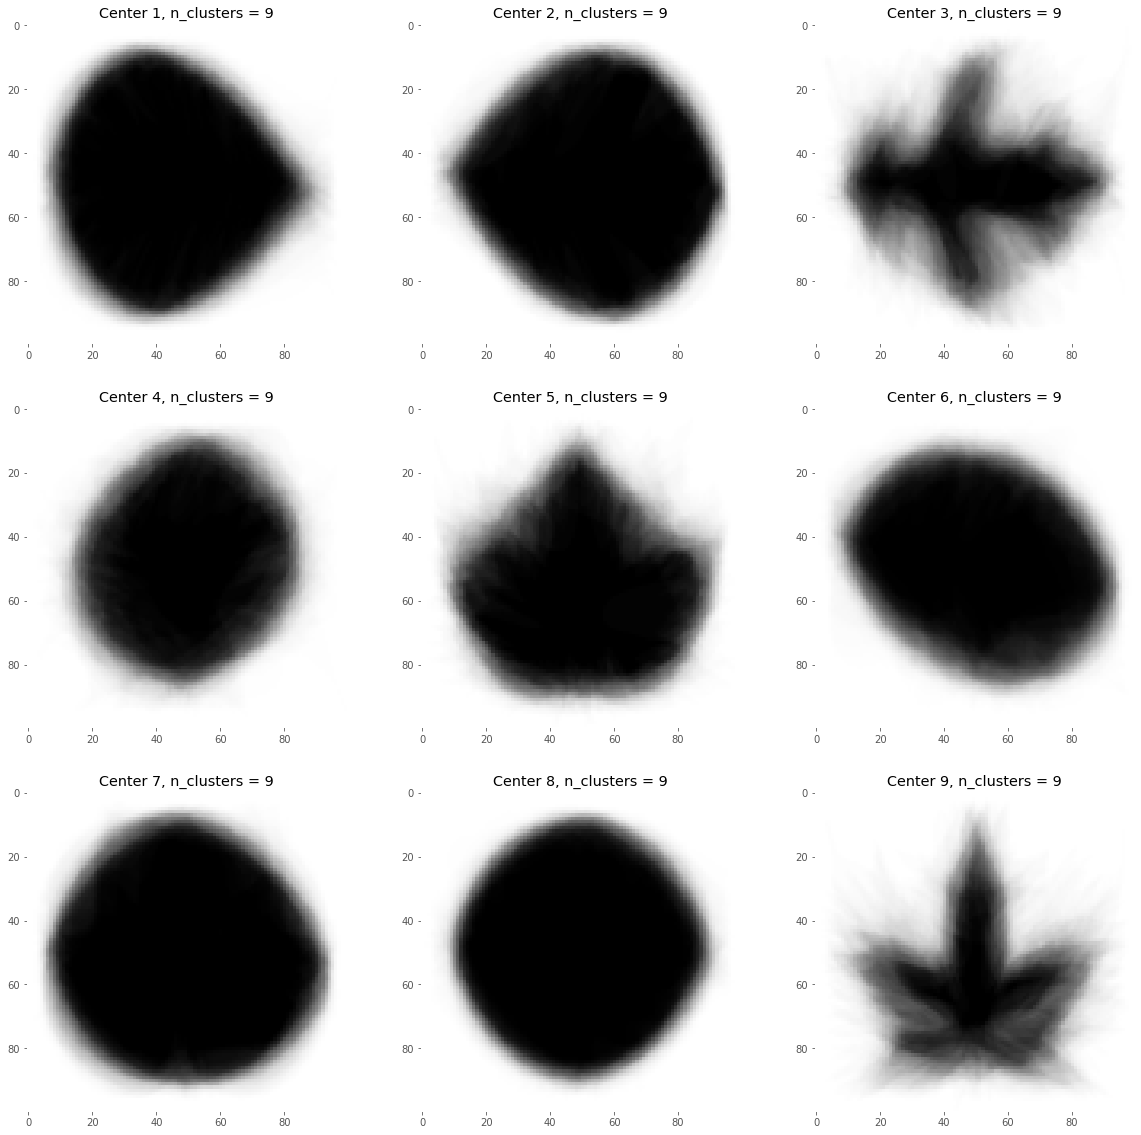

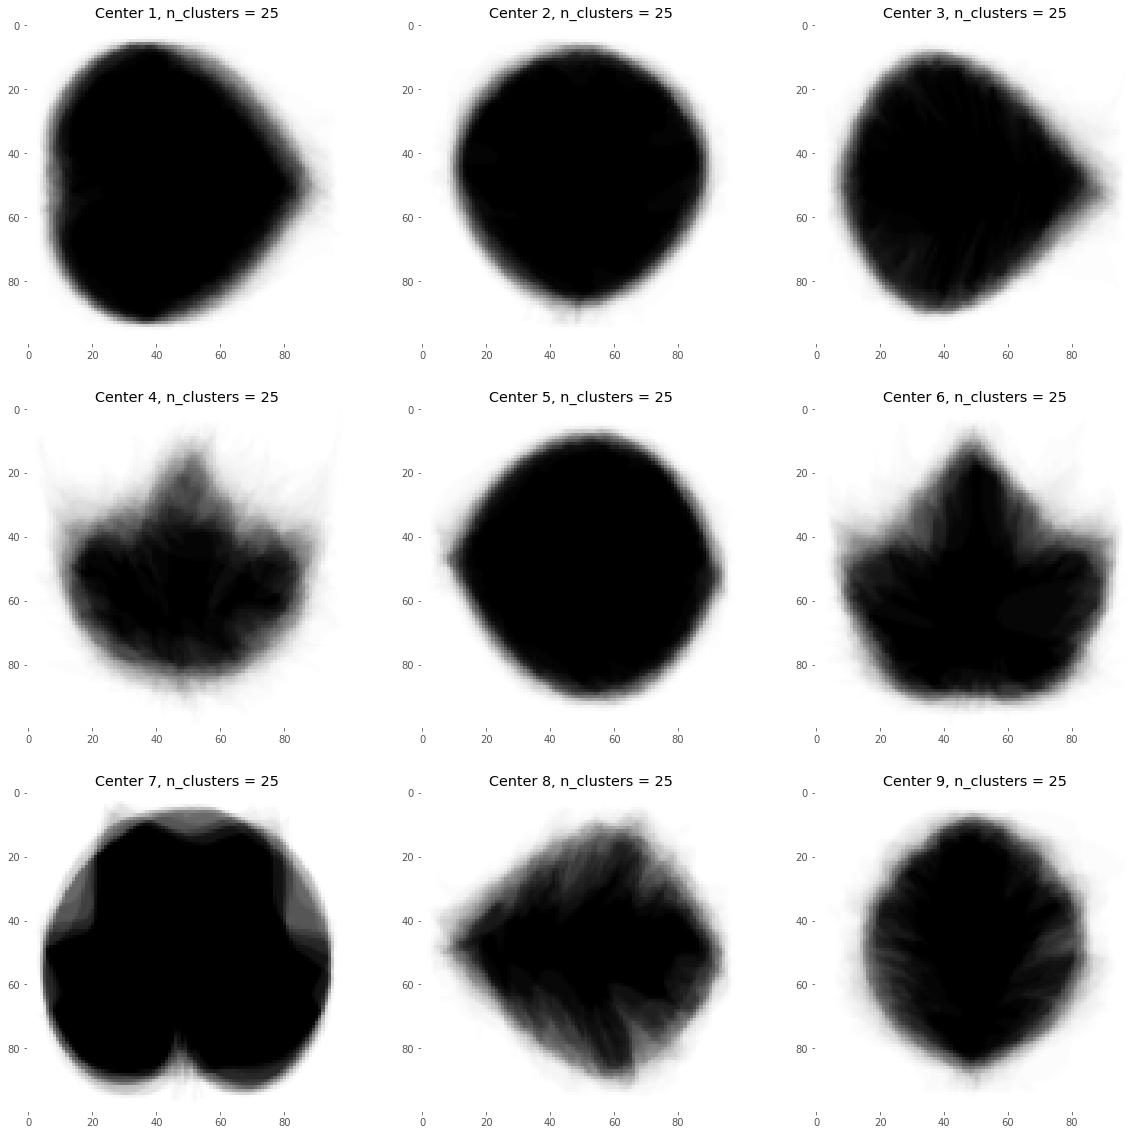

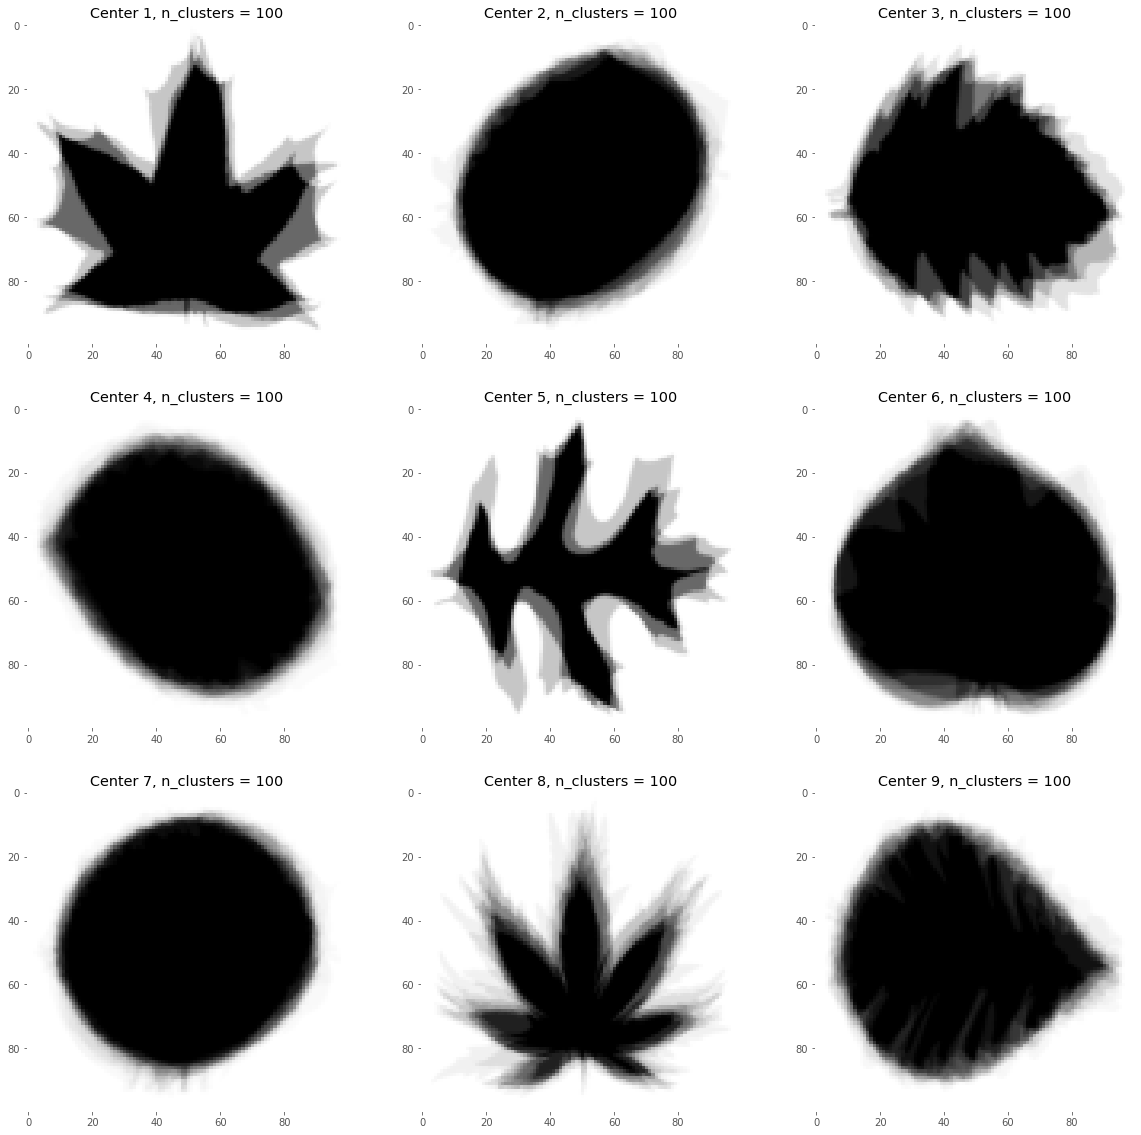

In [ ]:
from sklearn.cluster import KMeans

n_clusters = [9, 25, 100]
for n in n_clusters:
  k_means = KMeans(n_clusters = n)
  k_means = k_means.fit(imgs_train)
  clusters = k_means.predict(imgs_train)

  plt.figure(figsize= (20,20))

  centers = k_means.cluster_centers_

  for i in range(1, 10): 
    plt.subplot(3, 3, i)
    cntr = np.reshape(centers[i-1], (100,100))
    plt.imshow(cntr, cmap='Greys')
    plt.title('Center {0}, n_clusters = {1}'.format(i, n))
    plt.grid(None)

Ответьте на вопросы:
* Похожи ли центры кластеров на листья?
* В чем отличие от картинок листьев? В чем причина этого отличия?
* Есть ли среди кластеров похожие (или повторяющиеся)? 
* Какое, по вашему мнению, количество кластеров лучше всего подходит под эти данные? Почему?

1) Центры кластеров похожи на листья.

2) Отличие от листьев - размытые края "листьев", то есть изображение центра это нечеткое изображение листа. Это произошло из-за того, что на краях количество изображений, соответственно точек, близких к центру кластера, уменьшается (изоюражения могут быть повернуты, разного размера, но при этом быть похожи и принадлежать одному кластеру), поэтому значения точек на краях "листа" центра уменьшается, и пиксели становятся более бледными.

3) При n_clusters = 9 получилось 4 похожих кластера (№1, 2, 7, 8) \\
При n_clusters = 25 - 3 похожих кластера (1, 2, 5) \\
При n_clusters = 100 - 4 похожих кластера (2, 4, 6, 7) \\

4) Лучше всего взять 25 кластеров, так как среди них меньше всего похожих центров, то есть алгоритм отнесет большее число похожих листьев в один кластер.

## 3. Prediction
Перейдем к решению задачи предсказания.

### 3 классификатора (1 балл код + 1 балл выводы)
Настройте 3 классификатора на изображениях и выполните их визуализацию.
* Начнем с примитивного метрического классификатора - [центроидного](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html). Он использует идеи k-Means для решения задачи классификации: для каждого класса находит его центр (усреднением) - это обучение, а затем на этапе предсказания относит объект к тому классу, к центру которого он ближе. Настройте классификатор с гиперпараметрами по умолчанию на обучающей выборке. Выведите качество предсказания (accuracy) на контрольной выборке.
* Теперь по аналогии с KMeans визуализируйте центры классов - нарисуйте 99 изображений.
* Второй классификатор - наивный байесовский. Мы не рассматривали его в курсе, но про него можно почитать в [документации sklearn](http://scikit-learn.org/stable/modules/naive_bayes.html). Мы знаем, что наши признаки принимаю целочисленные значения, поэтому для описания признаков подойдет мультиномиальное распределение. Настройте MultinomialNB для наших данных, выведите качество на контрольных данных.
* У MultinomialNB после обучения появляется атрибут feature\_log\_prob_ - это оцененный по данным логарифм вероятности каждого признака для каждого класса $P(x_i|y)$ (выведите форму атриюута, чтобы лучше понять, что имеется в виду). Визуализируйте эту матрицу в виде изображений 100x100 по аналогии с предыдущим классификатором.
* Третий классификатор - линейный. Настройте LogisticRegression и выведите качество на контрольной выборке.
* Отобразите веса для каждого класса в виде картинки 100x100.

In [ ]:
from sklearn.metrics import accuracy_score

def metrics(y_test, y_pred, classif):
  print('Accuracy of {} : '.format(classif), accuracy_score(y_test, y_pred))

In [ ]:
imgs_sp_train = imgs_train[train_idx]
imgs_sp_test = imgs_train[test_idx]

In [ ]:
from sklearn.neighbors import NearestCentroid

clf = NearestCentroid()
clf.fit(imgs_sp_train, y_train)
metrics(y_test, clf.predict(imgs_sp_test), 'NearestCentroid')

Accuracy of NearestCentroid :  0.5606060606060606


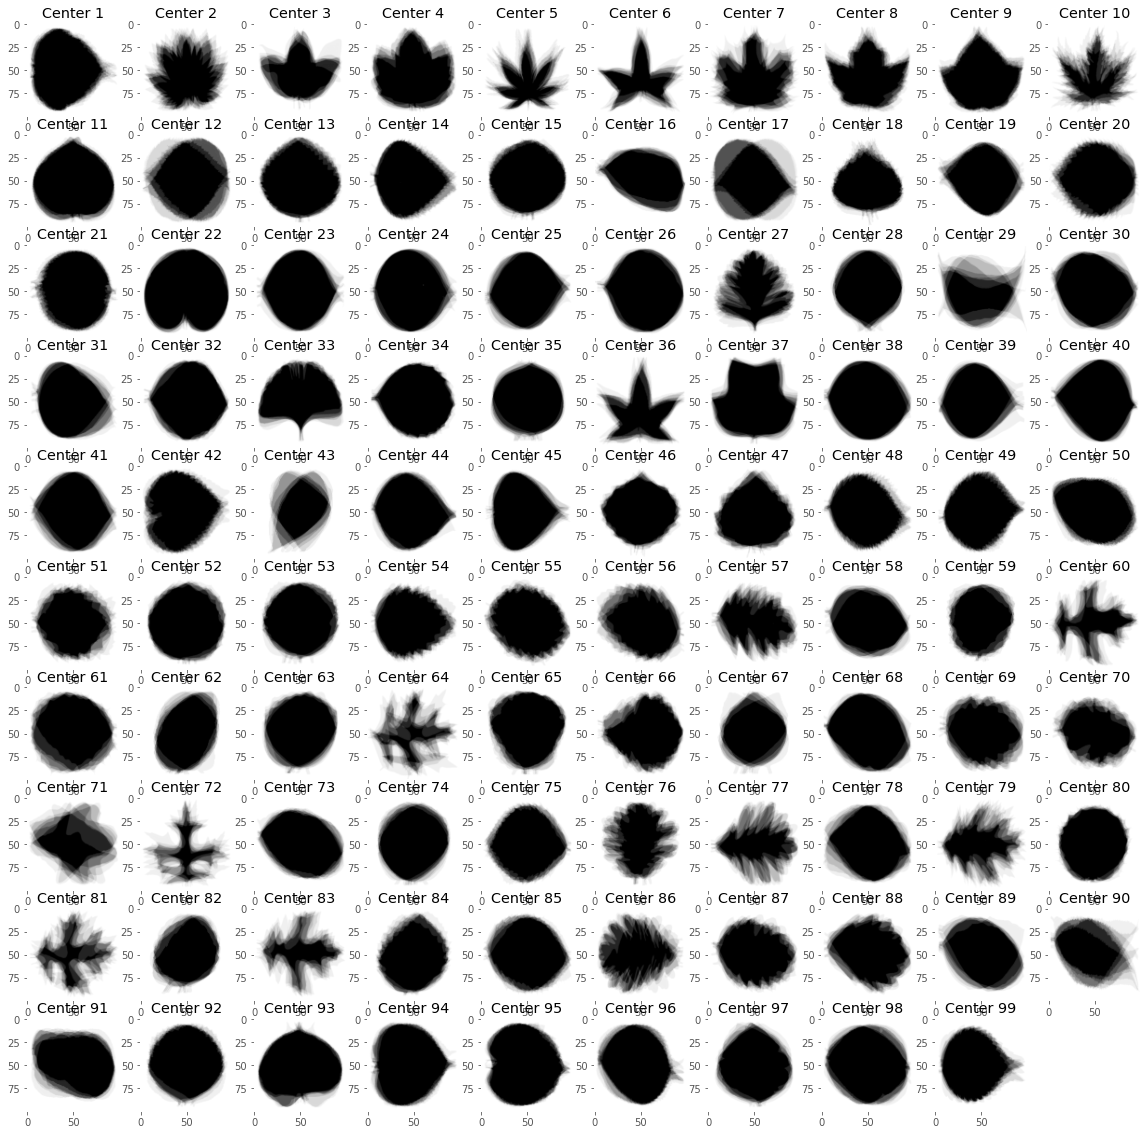

In [ ]:
plt.figure(figsize=(20,20))

centers = clf.centroids_

for i in range(1, 100): 
  plt.subplot(10, 10, i)
  cntr = np.reshape(centers[i-1], (100,100))
  plt.imshow(cntr, cmap='Greys')
  plt.title('Center {}'.format(i))
  plt.grid(None)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

clfnb = MultinomialNB()
clfnb.fit(imgs_sp_train, y_train)
metrics(y_test, clfnb.predict(imgs_sp_test), 'MultinomialNB')

Accuracy of MultinomialNB :  0.4696969696969697


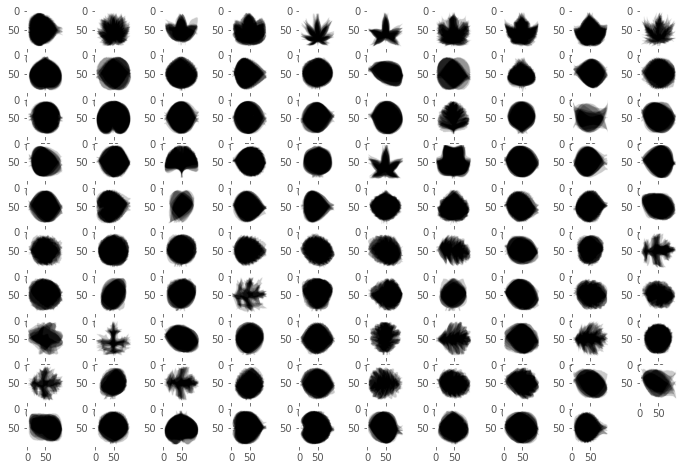

In [ ]:
prob = clfnb.feature_log_prob_

for i in range(1, 100): 
  plt.subplot(10, 10, i)
  pr = np.reshape(prob[i-1], (100,100))
  plt.imshow(pr, cmap='Greys')
  plt.grid(None)

In [ ]:
from sklearn.linear_model import LogisticRegression

clflr = LogisticRegression(max_iter=1000, solver='liblinear')
clflr.fit(imgs_sp_train, y_train)
metrics(y_test, clflr.predict(imgs_sp_test), 'LogisticRegrission')

Accuracy of LogisticRegrission :  0.6161616161616161


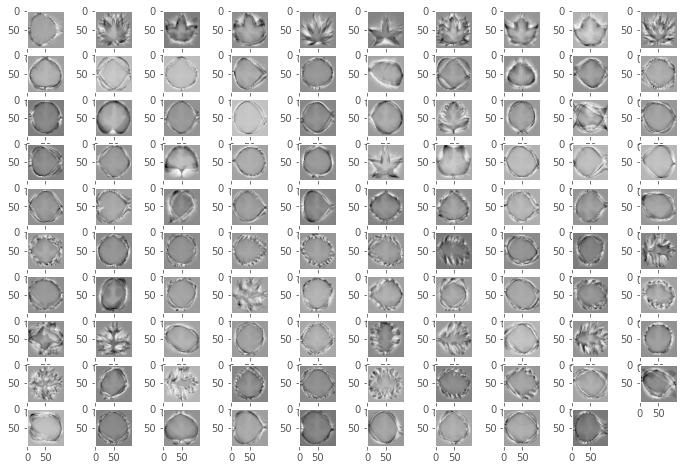

In [ ]:
coef = clflr.coef_

for i in range(1, 100): 
  plt.subplot(10, 10, i)
  weights = np.reshape(coef[i-1], (100,100))
  plt.imshow(weights, cmap='Greys')
  plt.grid(None)

Ответьте на вопросы:
* Какой классификатор работает лучше? Предположите, почему.
* Похожи ли центры кластеров на исходные изображения листьев? А визуализированные вероятности? А веса?
* Как вы думаете, почему картинки весов линейного классификатора отличаются от остальных визуализаций?

1) Лучше всего работает логистическая регрессия (больше accuracy). 

2) Все полученные картинки (центров кластеров, вероятностей, весов) похожи на листья.

3) Это связано с тем, что в логистической регрессии веса сначала слачайно инициализируются, а затем настраиваются при  минимизации функции потерь, то есть пиксели, которые не относятся к изображению листа, все равно будут иметь ненулевое значение. В центроидном и наивном байесовском классификаторах значения координат векторов центров кластеров и вероятностей соответственно будут иметь ненулевые значения только на границах и внутри листа, а вне него будут равны нулю.

### Случайный лес (0.25 балла код + 0.25 балла выводы)
* Настройте случайный лес на изображениях. Выведите качество на контроле.
* Отобразите feature\_importances\_ в виде картинки 100x100.

Ответьте на вопросы:
* похожа ли картинка на изображение листа?
* соответствует ли картинка здравому смыслу? Можно ли сказать, что участки картинки, которые RF определил как неважные, действительно не помогают определить класс листа? Ответить на вопрос поможет сопоставление с изображением разброса каждого признака по выборке (см. раздел Простая визуализация, последний пункт).

## 4. Feature engeneering and selection

Попробовали методы - надо попробовать новые признаки.

### Понижение размерности + RF (0.5 балла код + 0.5 балла выводы)
Сейчас наши данные имеют высокую размерность признакового описания - 10000. А надо ли столько много? Не окажется ли, что реально вся информация может быть записана в гораздо меньшее количество признаков?
* Для всех значений числа компонент в num_components обучите PCA с такой размерностью и на этих признаках обучите случайный лес. Запишите в отдельные массивы качество на обучении и качество на контроле. 
* Для RF на исходных признаках выведите качество и на контроле, и на обучении.
* На одной картинке постройте три графика: по оси x - число компонент, по оси ординат - качество; первый график - качество на обучении, второй - качество на контроле, третий - горизонтальная прямая (качество на контроле на исходных признаках).

_Примечание._ Чтобы построить 3 графика на одной картинке, просто используйте plt.plot(xs, ys) три раза подряд без plt.show(). После этого вставьте строку plt.xscale("log"), чтобы масштаб по оси абсцисс был логарифмическим.

In [ ]:
num_components = 2**np.arange(10)

Ответьте на вопросы:
* Можно ли сказать, что случайный лес переобучается?
* Можно ли указать число компонент, при котором достигается максимальное качество на контроле? Сильно ли это значение отличается от качество на всех признаках?

### Обучение модели на табличных данных (0.25 балла код + 0.25 балла выводы)

В этом пункте мы возьмем табличные данные - те, которые открывали в самом начале. Это некие характеристики листьев, извлеченные из картинок. Будем считать это хорошим feature engineering'ом - как будто мы взяли и нагенерировли хороших признаков. Теперь настроим под них классификатор.

Обучите RandomForest на табличных данных, выведите качество на контроле, сравните его с качеством модели, обученной на исходных изображениях листьев. Сильно ли изменилось качество? Как вы думаете, почему?

### Бонусное задание (2 балла): Настройка гиперпараметров случайного леса
С помощью `GridSearchCV` или `RandomizedSearchCV` подберите параметры для случайного леса для модели на табличных данных.

* Используйте `StratifiedKFold` на 4х фолдах (используйте только обучающую выборку). Мера качества - `accuracy`
* Примените оптимальную модель на контрольной выборке
* Для нескольких любых случаев, где была допущена ошибка, выведите истинное изображение листа и одно из изображений листа предсказанного класса.